# Install and import libraries

In [1]:
"""
!pip install --quiet duckdb
!pip install --quiet jupysql 
!pip install --quiet duckdb-engine
!pip install --quiet pandas
!pip install --quiet matplotlib
"""

'\n!pip install --quiet duckdb\n!pip install --quiet jupysql \n!pip install --quiet duckdb-engine\n!pip install --quiet pandas\n!pip install --quiet matplotlib\n'

In [45]:
import duckdb
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt
import sys
import re

import numpy as np
import pandas as pd

import plotly.express as px
import cufflinks as cf
cf.go_offline()

import statistics

# Import with duckdb the diamonds_train tables

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
conn = duckdb.connect("../data/diamonds_train.db",read_only=True)

In [5]:
pd.set_option('mode.chained_assignment',None)

In [6]:
diamonds_city = conn.execute('SELECT * FROM diamonds_city').fetch_df()
diamonds_city

,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris
5,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv
6,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai
7,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly
8,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat
9,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp


In [7]:
list(diamonds_city['city_id'])

['0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039eeba82d1891acf0d61',
 '1e73b1647343b286269d517e6f07e6e07ccef10cd7b785e4e14e42237263614b',
 '2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883053ebc3b89ef4ddef9',
 '5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2ee822880eac13599c3',
 '5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204b8a5836cc50597a6b1',
 '68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e7158b363e139438451691',
 '6c425048aa7badd9d84615bd8620ca1864efd81cfdb69dcd5d5a94b68013d48d',
 '89c7286890f7347ab235234e74d406596a127ae3679042f6d0e3e58aa41d045c',
 'ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b257bca7c51cb108757e',
 'ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead47b53a10dc5d4fb619c',
 'e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3bc2dd9e0854278b970',
 'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7',
 'ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa6a18f7f81dff91d5db']

In [8]:
diamonds_clarity = conn.execute('SELECT * FROM diamonds_clarity').fetch_df()
diamonds_clarity

,clarity_id,clarity
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2
1,3f9db06236e9719b61c826b612b882fa702ec81574e44c...,VVS2
2,66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...,VVS1
3,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF
4,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1
5,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1
6,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1
7,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2


In [9]:
list(diamonds_clarity['clarity_id'])

['03c358cbd92e83278fd523f58dc6a9b4b198d00728af65a6b43eef5e874d2715',
 '3f9db06236e9719b61c826b612b882fa702ec81574e44c04e8f047a7a3b0e798',
 '66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d88752f0eed289832ed3',
 '7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d380467472757b6866ed',
 'bd4f4a250da88f87729febc739ae97f439a14f9d38f0e31d4d389529e2f939c2',
 'c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4718cfb6807c5f7d1b0',
 'ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee7cae713008403c1b27',
 'f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f23b38bfb65fd9ed86c6']

In [10]:
diamonds_color = conn.execute('SELECT * FROM diamonds_color').fetch_df()
diamonds_color

,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D
2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H
3,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J
4,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,I
5,a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...,E
6,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F


In [11]:
list(diamonds_color['color_id'])

['333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3b4aee8eed6d70191a3',
 '3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0ebfda1a01ec05745d43',
 '44bd7ae60f478fae1061e11a7739f4b94d1daf917982d33b6fc8a01a63f89c21',
 '6da43b944e494e885e69af021f93c6d9331c78aa228084711429160a5bbd15b5',
 'a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919271f9fa140b0508c6c',
 'a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0e22207b8981233ec58',
 'f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d3788d2723d7bfacbe28a9']

In [12]:
diamonds_cut = conn.execute('SELECT * FROM diamonds_cut').fetch_df()
diamonds_cut

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal
2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
3,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
4,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair


In [13]:
list(diamonds_cut['cut_id'])

['388655e25e91872329272fc10128ef5354b3b19a05d7e8e8690bb2f24773d623',
 '4e3cfaa334cbafb57a399a98fad8d3812ece460018f457089c61c57a242c3614',
 'c939327ca16dcf97ca32521d8b834bf1de16573d21deda3bb2a337cf403787a6',
 'de88c121a82a06352bf1aaceba20578356408a334ba046a1084d4e50da923c5e',
 'f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7f901358a34c1f8710c']

In [14]:
diamonds_dimensions = conn.execute('SELECT * FROM diamonds_dimensions').fetch_df()
diamonds_dimensions

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76


In [15]:
diamonds_properties = conn.execute('SELECT * FROM diamonds_properties').fetch_df()
diamonds_properties

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [16]:
diamonds_transactional = conn.execute('SELECT * FROM diamonds_transactional').fetch_df()
diamonds_transactional

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,89c7286890f7347ab235234e74d406596a127ae3679042...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,89c7286890f7347ab235234e74d406596a127ae3679042...,0.33


# Merge the dataframes by the different id's

In [17]:
df1 = pd.merge(pd.merge(diamonds_dimensions, diamonds_properties, on='index_id'), diamonds_transactional, on='index_id')
df1

,index_id,depth,table,x,y,z,cut_id,color_id,clarity_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,5457,89c7286890f7347ab235234e74d406596a127ae3679042...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,456,89c7286890f7347ab235234e74d406596a127ae3679042...,0.33


In [18]:
df2 = pd.merge(df1, diamonds_cut, on = 'cut_id')
df3 = pd.merge(df2, diamonds_color, on = 'color_id')
df4 = pd.merge(df3, diamonds_clarity, on = 'clarity_id')
df5 = pd.merge(df4, diamonds_city, on = 'city_id')
df5

,index_id,depth,table,x,y,z,cut_id,color_id,clarity_id,price,city_id,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Premium,J,VS2,Dubai
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,3513,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,Premium,J,VS2,Dubai
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,1792,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.77,Premium,J,VS2,Dubai
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,7553,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.51,Premium,J,VS2,Dubai
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,1176,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.57,Premium,J,VS2,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,3df6f3da962b819057888dbbe3cf4d11f9a59261ba0af7...,62.2,54.0,5.24,5.27,3.27,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,2729,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.54,Ideal,F,IF,Surat
40451,e5bc95d36abda5bfd67641eca60f2ab92f37b27c0397e0...,61.9,54.0,5.22,5.25,3.24,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,2802,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.53,Ideal,F,IF,Surat
40452,5ad0fcca0db9b3d399e31a3d909a1a3f4da38c663256b3...,62.3,55.0,4.30,4.34,2.69,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,886,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.30,Ideal,F,IF,Surat
40453,c8559278b1ac356e1e414320a4efbbe788dc16623e7873...,60.9,55.0,4.15,4.23,2.55,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,768,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.26,Ideal,F,IF,Surat


# Keep only the columns that I need

In [19]:
df6 = df5[["index_id", "depth", "table", "x", "y", "z", "price", "carat", "cut", "color", "clarity", "city"]]
df6.head()

,index_id,depth,table,x,y,z,price,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,1.21,Premium,J,VS2,Dubai
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,1.02,Premium,J,VS2,Dubai
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,0.77,Premium,J,VS2,Dubai
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,1.51,Premium,J,VS2,Dubai
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,0.57,Premium,J,VS2,Dubai


In [20]:
diamonds_train = df6[["price", "carat", "cut", "color", "clarity", "x", "y", "z", "depth", "table", "city"]]
diamonds_train_sorted = diamonds_train.sort_values(by='price').reset_index(drop=True)
diamonds_train_sorted

,price,carat,cut,color,clarity,x,y,z,depth,table,city
0,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,Tel Aviv
1,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,Paris
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,Zurich
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,Kimberly
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,Tel Aviv
...,...,...,...,...,...,...,...,...,...,...,...
40450,18795,2.04,Premium,H,SI1,8.37,8.28,4.84,58.1,60.0,Amsterdam
40451,18797,2.29,Premium,I,SI1,8.52,8.45,5.24,61.8,59.0,Surat
40452,18806,1.51,Ideal,G,IF,7.37,7.41,4.56,61.7,55.0,New York City
40453,18818,2.00,Very Good,G,SI1,7.90,7.97,5.04,63.5,56.0,Madrid


# Some statistics about the diamonds

In [82]:
print(diamonds_train_sorted['price'].mean())
print(diamonds_train_sorted['price'].median())
print(statistics.stdev(diamonds_train_sorted['price']))
print(diamonds_train_sorted['price'].min())
print(diamonds_train_sorted['price'].max())

3928.444469163268
2397.0
3992.4161466170863
326
18823


In [83]:
print(diamonds_train_sorted['carat'].mean())
print(diamonds_train_sorted['carat'].median())
print(statistics.stdev(diamonds_train_sorted['carat']))
print(diamonds_train_sorted['carat'].min())
print(diamonds_train_sorted['carat'].max())

0.7977055988134965
0.7
0.47554421532469
0.2
4.5


In [84]:
print(diamonds_train_sorted['x'].mean())
print(diamonds_train_sorted['x'].median())
print(statistics.stdev(diamonds_train_sorted['x']))
print(diamonds_train_sorted['x'].min())
print(diamonds_train_sorted['x'].max())

5.72939166975652
5.69
1.1244526926186047
0.0
10.23


In [85]:
print(diamonds_train_sorted['y'].mean())
print(diamonds_train_sorted['y'].median())
print(statistics.stdev(diamonds_train_sorted['y']))
print(diamonds_train_sorted['y'].min())
print(diamonds_train_sorted['y'].max())

5.732818687430478
5.71
1.1466498960912475
0.0
58.9


In [86]:
print(diamonds_train_sorted['z'].mean())
print(diamonds_train_sorted['z'].median())
print(statistics.stdev(diamonds_train_sorted['z']))
print(diamonds_train_sorted['z'].min())
print(diamonds_train_sorted['z'].max())

3.5371536274873314
3.52
0.6970615911262312
0.0
8.06


In [87]:
print(diamonds_train_sorted['depth'].mean())
print(diamonds_train_sorted['depth'].median())
print(statistics.stdev(diamonds_train_sorted['depth']))
print(diamonds_train_sorted['depth'].min())
print(diamonds_train_sorted['depth'].max())

61.752841428747985
61.8
1.4317253979076188
43.0
79.0


In [88]:
print(diamonds_train_sorted['table'].mean())
print(diamonds_train_sorted['table'].median())
print(statistics.stdev(diamonds_train_sorted['table']))
print(diamonds_train_sorted['table'].min())
print(diamonds_train_sorted['table'].max())

57.446132740081566
57.0
2.2335352685809777
43.0
95.0


In [97]:
propoprtion_cut = round(diamonds_train_sorted['cut'].value_counts().sort_values() * 100 / 40455)
propoprtion_cut

Fair          3.0
Good          9.0
Very Good    22.0
Premium      25.0
Ideal        40.0
Name: cut, dtype: float64

In [98]:
propoprtion_color = round(diamonds_train_sorted['color'].value_counts().sort_values() * 100 / 40455)
propoprtion_color

J     5.0
I    10.0
D    12.0
H    16.0
F    18.0
E    18.0
G    21.0
Name: color, dtype: float64

In [99]:
propoprtion_clarity = round(diamonds_train_sorted['clarity'].value_counts().sort_values() * 100 / 40455)
propoprtion_clarity

I1       1.0
IF       3.0
VVS1     7.0
VVS2     9.0
VS1     15.0
SI2     17.0
VS2     23.0
SI1     24.0
Name: clarity, dtype: float64

In [100]:
propoprtion_city = round(diamonds_train_sorted['city'].value_counts().sort_values() * 100 / 40455)
propoprtion_city

London            6.0
Amsterdam         6.0
Zurich            6.0
Tel Aviv          6.0
Paris             6.0
Madrid            6.0
Dubai             6.0
Las Vegas         6.0
New York City     6.0
Luxembourg        6.0
Kimberly         12.0
Antwerp          12.0
Surat            13.0
Name: city, dtype: float64

# Some visualizations to understand de dataset

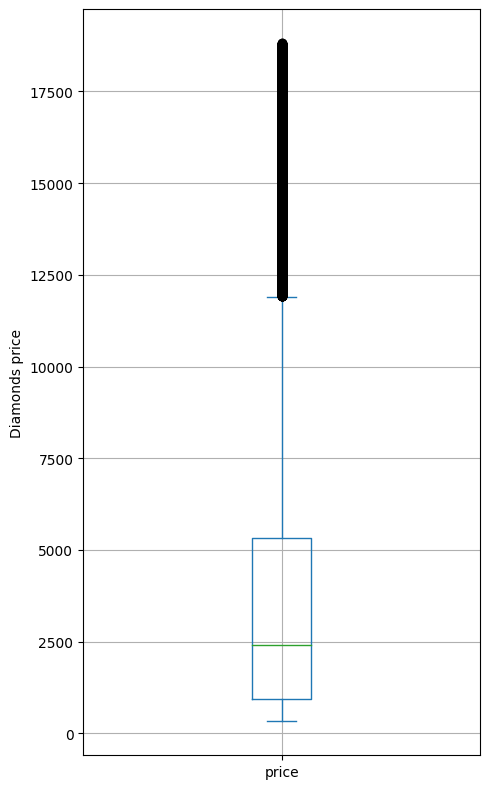

In [21]:
data = diamonds_train_sorted['price']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Diamonds price')
plt.tight_layout()
plt.grid()
plt.show()

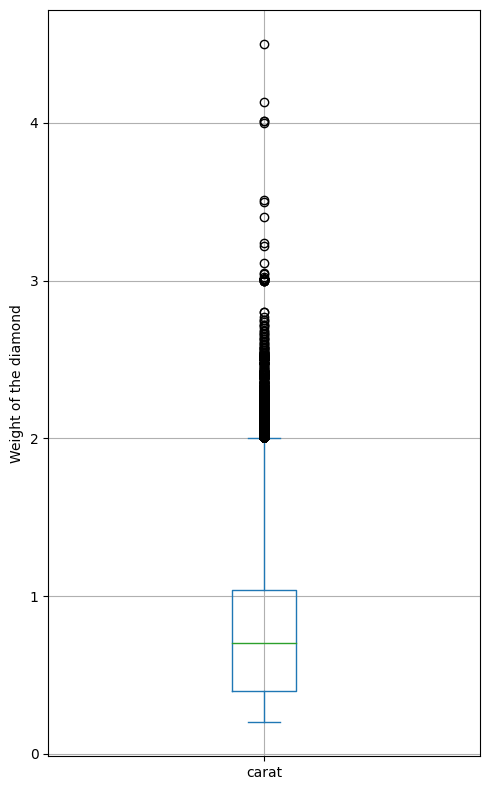

In [22]:
data = diamonds_train_sorted['carat']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Weight of the diamond')
plt.tight_layout()
plt.grid()
plt.show()

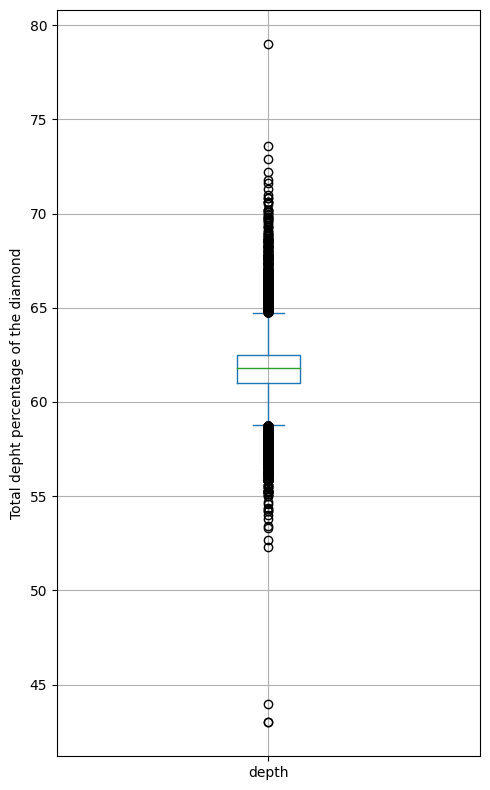

In [23]:
data = diamonds_train_sorted['depth']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Total depht percentage of the diamond')
plt.tight_layout()
plt.grid()
plt.show()

In [24]:
cut_price = diamonds_train_sorted[['price', 'cut']].groupby(['cut'], 
                    as_index=False).mean().sort_values(by = 'price', ascending= True).reset_index(drop = True)
cut_price

,cut,price
0,Ideal,3436.112577
1,Good,3880.611794
2,Very Good,3994.444420
3,Fair,4333.271980
4,Premium,4617.322612


In [25]:
cut_price.iplot(kind='bar',
                  x='cut',
                y='price',
                  xTitle='Cut',
                  yTitle='Price',
                  title='RELACIÓN PRECIO-CUT DE LOS DIAMANTES')

In [26]:
color_price = diamonds_train_sorted[['price', 'color']].groupby(['color'], 
                    as_index=False).mean().sort_values(by = 'price', ascending= True).reset_index(drop = True)
color_price

,color,price
0,E,3088.342526
1,D,3134.943157
2,F,3677.355720
3,G,4023.214902
4,H,4476.469014
5,I,5090.868800
6,J,5346.234112


In [27]:
color_price.iplot(kind='bar',
                  x='color',
                y='price',
                  xTitle='Color',
                  yTitle='Price',
                  title='RELACIÓN PRECIO-COLOR DEL DIAMANTE')

In [28]:
clarity_price = diamonds_train_sorted[['price', 'clarity']].groupby(['clarity'], 
                    as_index=False).mean().sort_values(by = 'price', ascending= True).reset_index(drop = True)
clarity_price

,clarity,price
0,VVS1,2559.498558
1,IF,2797.897513
2,VVS2,3240.978942
3,VS1,3796.813551
4,VS2,3913.590182
5,I1,3971.206039
6,SI1,3999.856908
7,SI2,5101.044307


In [29]:
clarity_price.iplot(kind='bar',
                  x='clarity',
                y='price',
                  xTitle='Clarity',
                  yTitle='Price',
                  title='RELACIÓN PRECIO-CLARIDAD DEL DIAMANTE')

In [30]:
city_price = diamonds_train_sorted[['price', 'city']].groupby(['city'], 
                    as_index=False).mean().sort_values(by = 'price', ascending= True).reset_index(drop = True)
city_price

,city,price
0,Tel Aviv,3753.746507
1,Antwerp,3842.225679
2,Luxembourg,3853.282809
3,Paris,3906.252569
4,Las Vegas,3919.199536
5,New York City,3927.937355
6,London,3952.769387
7,Surat,3966.823379
8,Madrid,3977.653937
9,Kimberly,3980.353095


In [31]:
city_price.iplot(kind='bar',
                  x='city',
                y='price',
                  xTitle='City',
                  yTitle='Price',
                  title='RELACIÓN PRECIO-CIUDAD DEL DIAMANTE')